In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
tag = "negative" # "positive", "negative"

In [3]:
experiments = [
    "O.sativa",
    "A.thaliana",
    "C.sinensis",
    "Z.mays",
    "T.aestivum",
    "G.max",
    "G.raimondii",
    "M.truncatula",
    "S.bicolor",
]

In [4]:
down_stream = []
up_stream = []
for experiment in experiments:
    df = pd.read_csv(f"../experiment/{experiment}/{tag}/Result/result_level1_filter.csv")    
    for index, row in df.iterrows():        
        mir_type = row['mir type']
        hit_start = int(row['hit start'])
        hit_end = int(row['hit end'])
        full_seq = row['full seq']
        star_start = int(row['star start'])
        star_end = int(row['star end'])    
        if mir_type == "5p":        
            down = full_seq[:hit_start-1]
            up = full_seq[star_end:]        
        elif mir_type == "3p":        
            down = full_seq[:star_start-1]
            up = full_seq[hit_end:]                     
        else:
            print("error")                        
        down_stream.append(down)
        up_stream.append(up)        

In [5]:
len_down_stream = [len(seq) for seq in down_stream]
len_up_stream = [len(seq) for seq in up_stream]

min: 0, max: 476


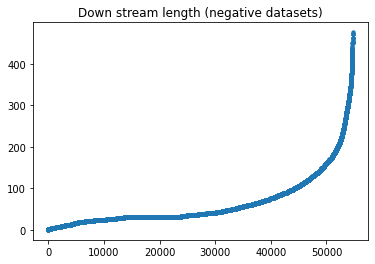

In [6]:
plt.plot(sorted(len_down_stream), ".")
plt.title(f"Down stream length ({tag} datasets)")
print(f'min: {min(len_down_stream)}, max: {max(len_down_stream)}')

min: 0, max: 476


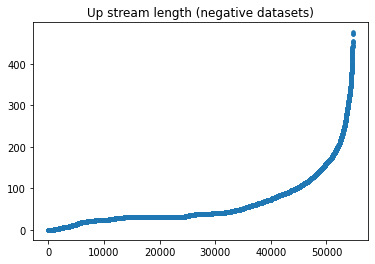

In [7]:
plt.plot(sorted(len_up_stream), ".")
plt.title(f"Up stream length ({tag} datasets)")
print(f'min: {min(len_up_stream)}, max: {max(len_up_stream)}')

# drop all up steam and downstrim lower than threshold

In [8]:
threshold = 20

In [9]:
down_stream = [seq[-threshold:] for seq in down_stream if len(seq) >= threshold]
up_stream = [seq[:threshold] for seq in up_stream if len(seq) >= threshold]

# convert to fasta

In [10]:
def convert(seq):
    seq = seq.replace("t", "u")
    seq = seq.replace("T", "u")
    seq = seq.replace("a", "A")
    seq = seq.replace("c", "C")
    seq = seq.replace("g", "G")
    seq = seq.replace("u", "U")
    return seq 

In [11]:
down_stream_fa = ""
#counter = 1
for seq in down_stream:  
    seq = convert(seq)
    seq = seq[::-1]
    #down_stream_fa += f">{counter}\n"
    #counter += 1
    down_stream_fa += seq + "\n"
with open(f"down_stream_{tag}.txt", "w") as file:
    file.write(down_stream_fa)

In [12]:
up_stream_fa = ""
#counter = 1
for seq in up_stream:
    seq = convert(seq)
    #up_stream_fa += f">{counter}\n"
    #counter += 1
    up_stream_fa += seq + "\n"
with open(f"up_stream_{tag}.txt", "w") as file:
    file.write(up_stream_fa)

# call weblogo

In [13]:
!weblogo --format PNG --sequence-type rna --units probability --color-scheme classic --resolution 600   < down_stream_{tag}.txt > ../results/weblogo_down_stream_{tag}.png

In [14]:
!weblogo --format PNG --sequence-type rna --units probability --color-scheme classic --resolution 600   < up_stream_{tag}.txt > ../results/weblogo_up_stream_{tag}.png